In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_theme()
plt.style.use('ggplot')
%matplotlib inline

In [4]:
df = pd.read_csv("kidney_disease.csv")

In [5]:
df.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [7]:
df.shape

(400, 26)

In [6]:
df.drop('id',axis=1, inplace=True)

In [7]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
# Ensure the list has 26 elements to match your DataFrame
df.columns = [
    'id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
    'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
    'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
    'aanemia', 'class'
]


In [10]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [12]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [13]:
df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia', 'class'],
      dtype='object')

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [15]:
cat_cols

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [16]:
num_cols

['id',
 'age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

In [17]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()}")

red_blood_cells has [nan 'normal' 'abnormal']
pus_cell has ['normal' 'abnormal' nan]
pus_cell_clumps has ['notpresent' 'present' nan]
bacteria has ['notpresent' 'present' nan]
hypertension has ['yes' 'no' nan]
diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease has ['no' 'yes' '\tno' nan]
appetite has ['good' 'poor' nan]
peda_edema has ['no' 'yes' nan]
aanemia has ['no' 'yes' nan]
class has ['ckd' 'ckd\t' 'notckd']


In [18]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no', '\tyes': 'yes', ' yes':'yes'}, inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value = 'no')
df['class'] = df['class'].replace(to_replace={'ckd\t':'ckd', 'notckd': 'not ckd'})

In [20]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has ['ckd' 'not ckd']


In [21]:
df['class'] = df['class'].map({'ckd':0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors = 'coerce')

In [22]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']
for col in cols:
    print(f"{col} has {df[col].unique()}")

diabetes_mellitus has ['yes' 'no' nan]
coronary_artery_disease has ['no' 'yes' nan]
class has [0 1]


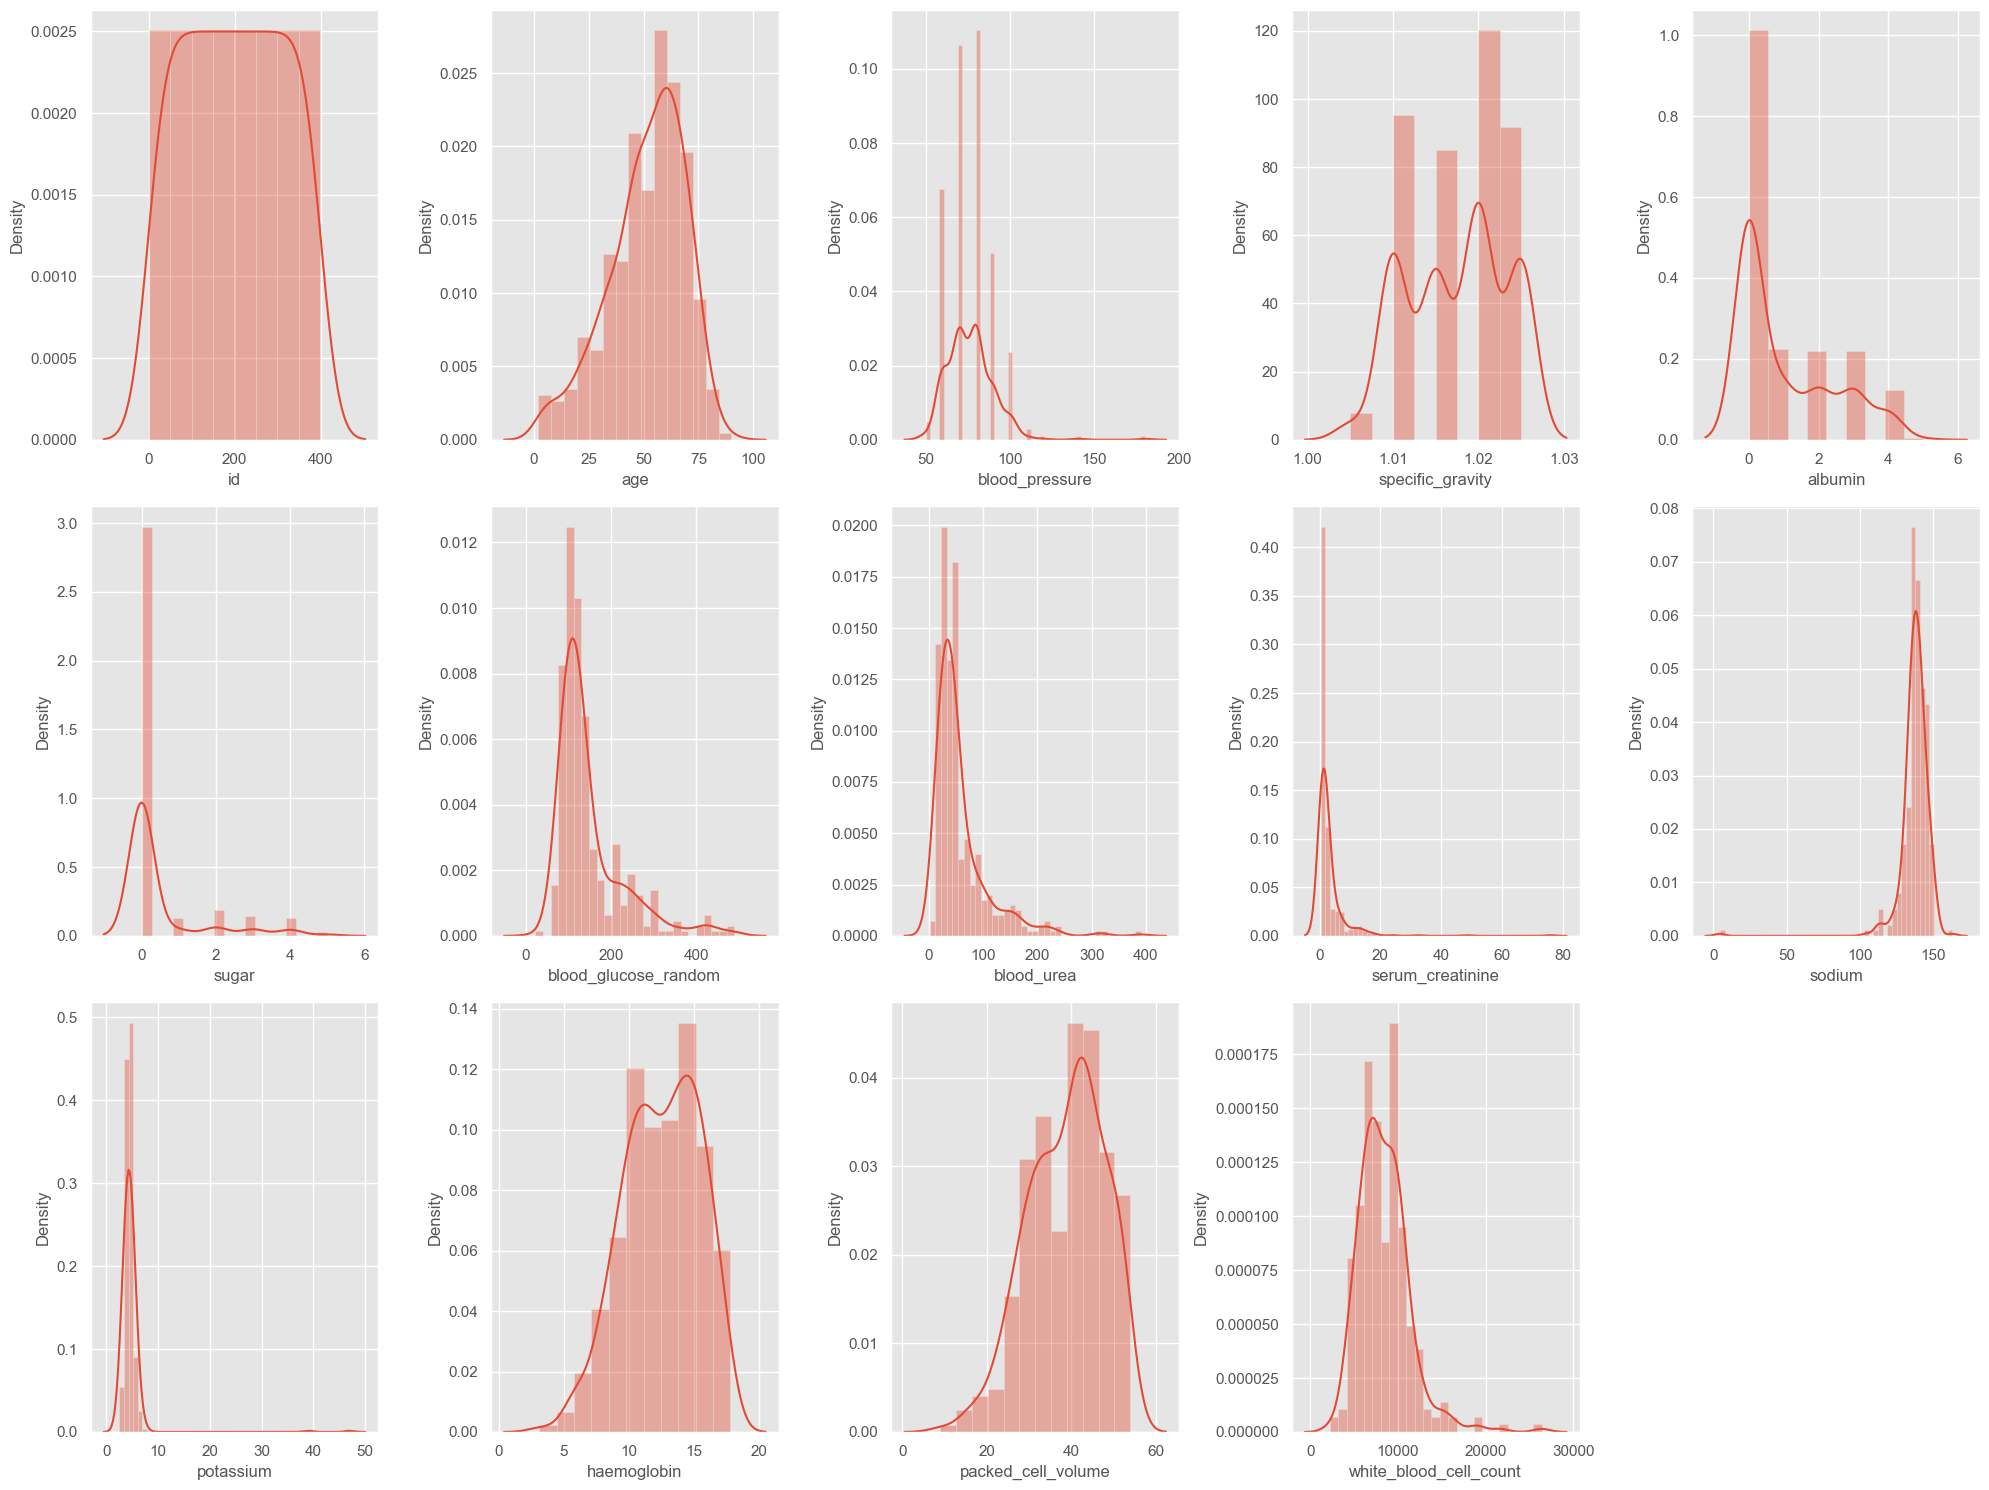

In [22]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

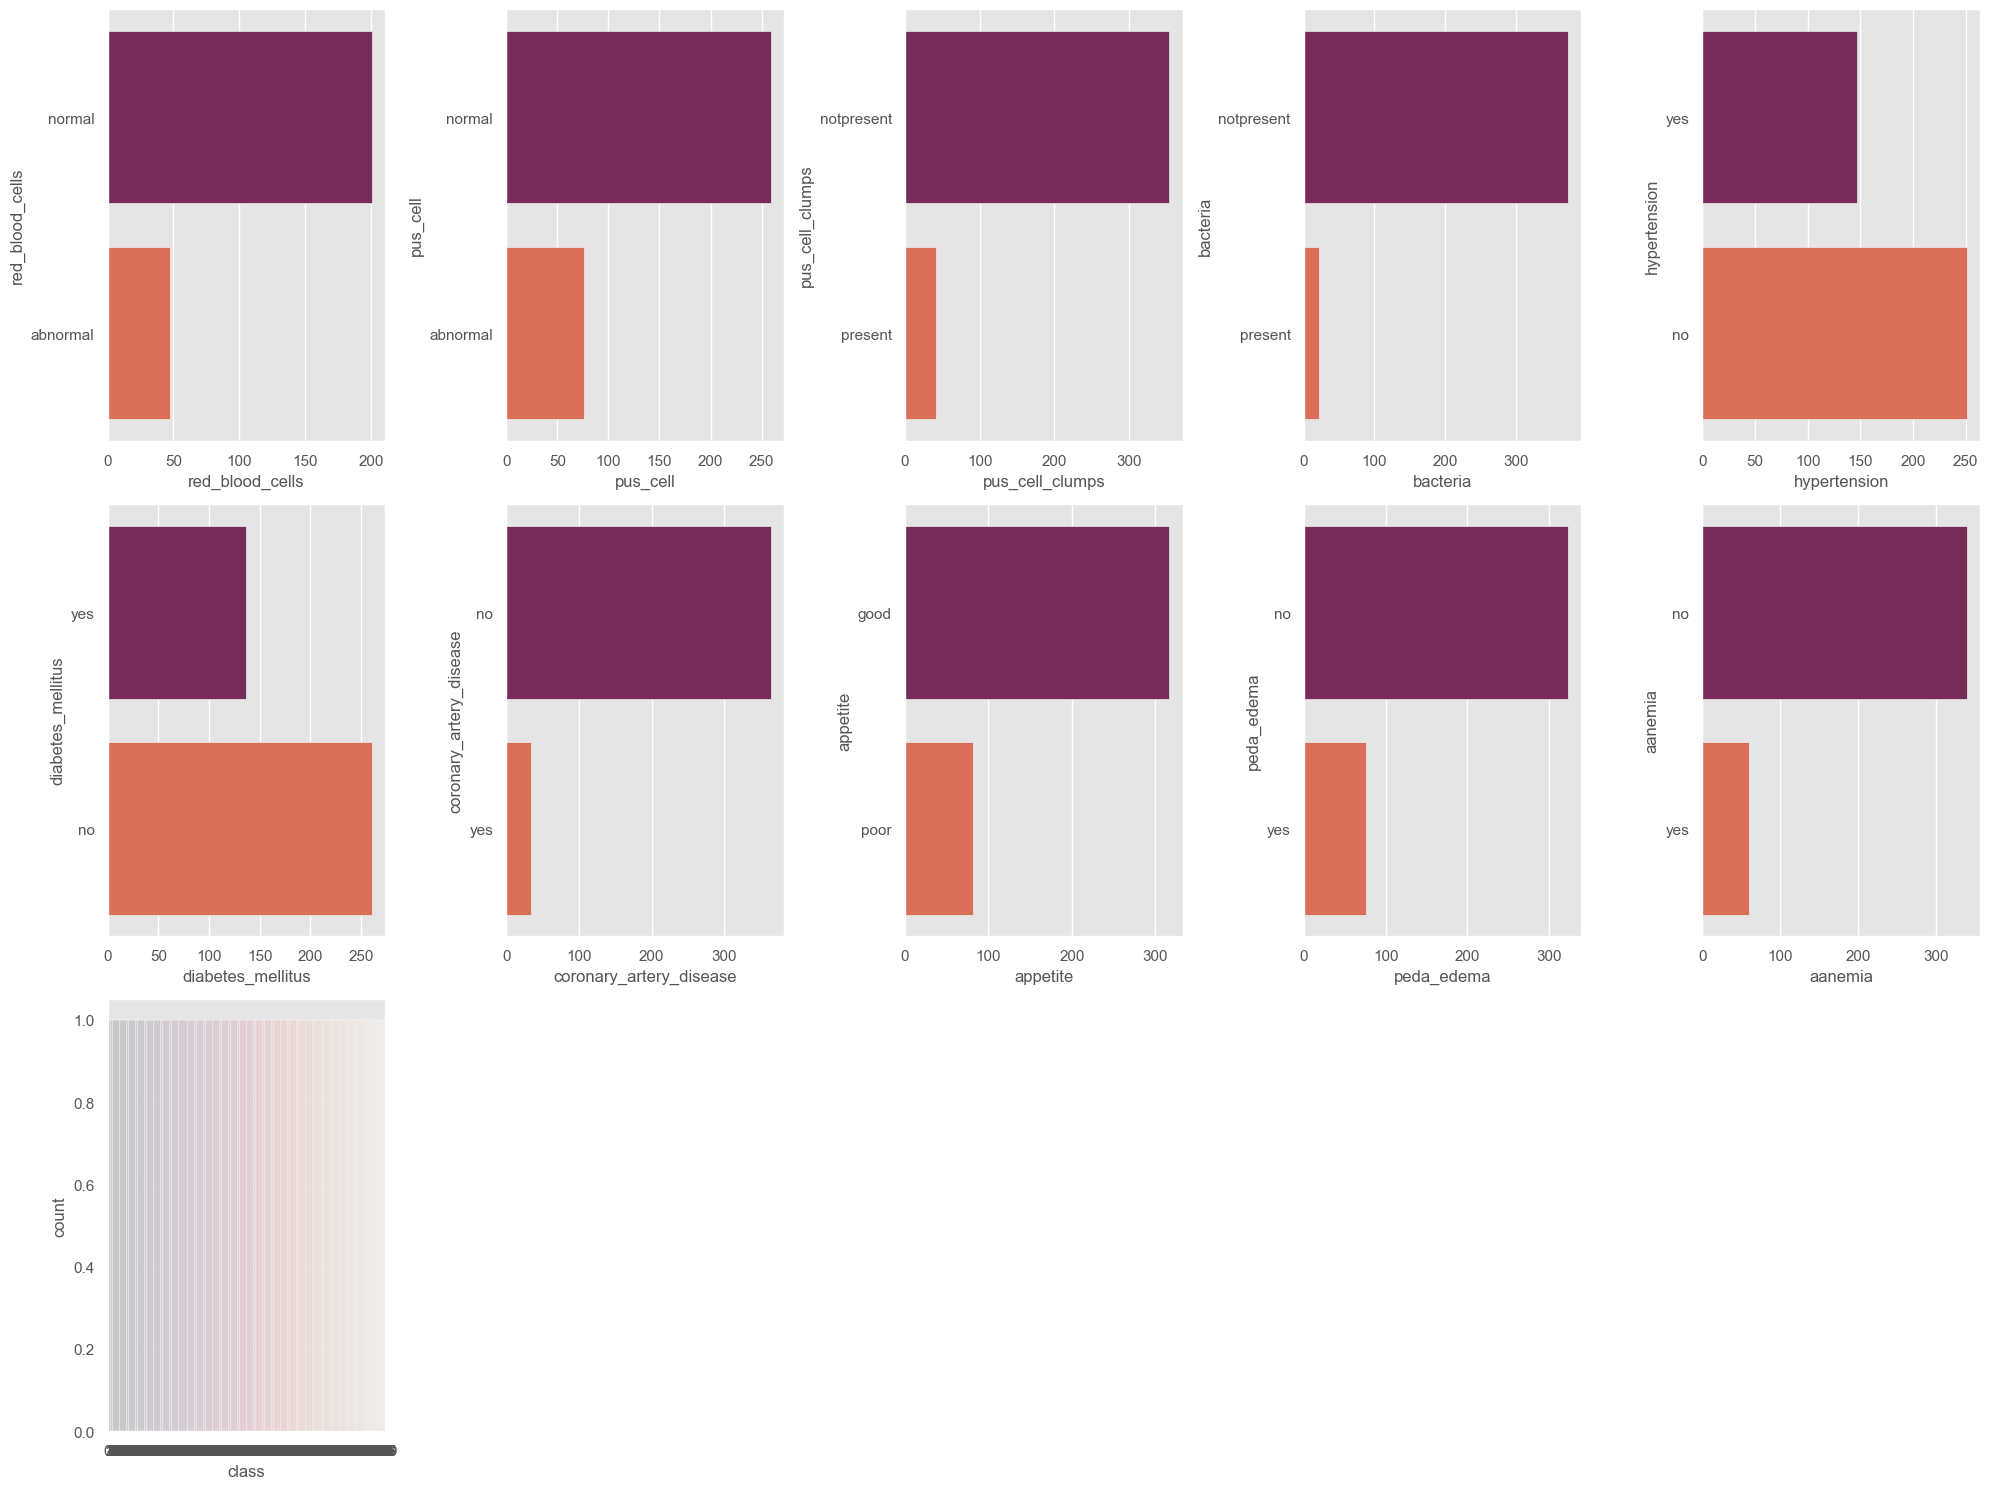

In [23]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.countplot(df[column] ,palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=[float, int])

# Now, calculate the correlation matrix
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                              id       age  blood_pressure  specific_gravity  \
id                      1.000000 -0.185308       -0.245744          0.642156   
age                    -0.185308  1.000000        0.159480         -0.191096   
blood_pressure         -0.245744  0.159480        1.000000         -0.218836   
specific_gravity        0.642156 -0.191096       -0.218836          1.000000   
albumin                -0.541993  0.122091        0.160689         -0.469760   
sugar                  -0.283416  0.220866        0.222576         -0.296234   
blood_glucose_random   -0.338673  0.244992        0.160193         -0.374710   
blood_urea             -0.307175  0.196985        0.188517         -0.314295   
serum_creatinine       -0.268683  0.132531        0.146222         -0.361473   
sodium                  0.364251 -0.100046       -0.116422          0.412190   
potassium              -0.092347  0.058377        0.075151         -0.072787   
haemoglobin             0.640298 -0.1929

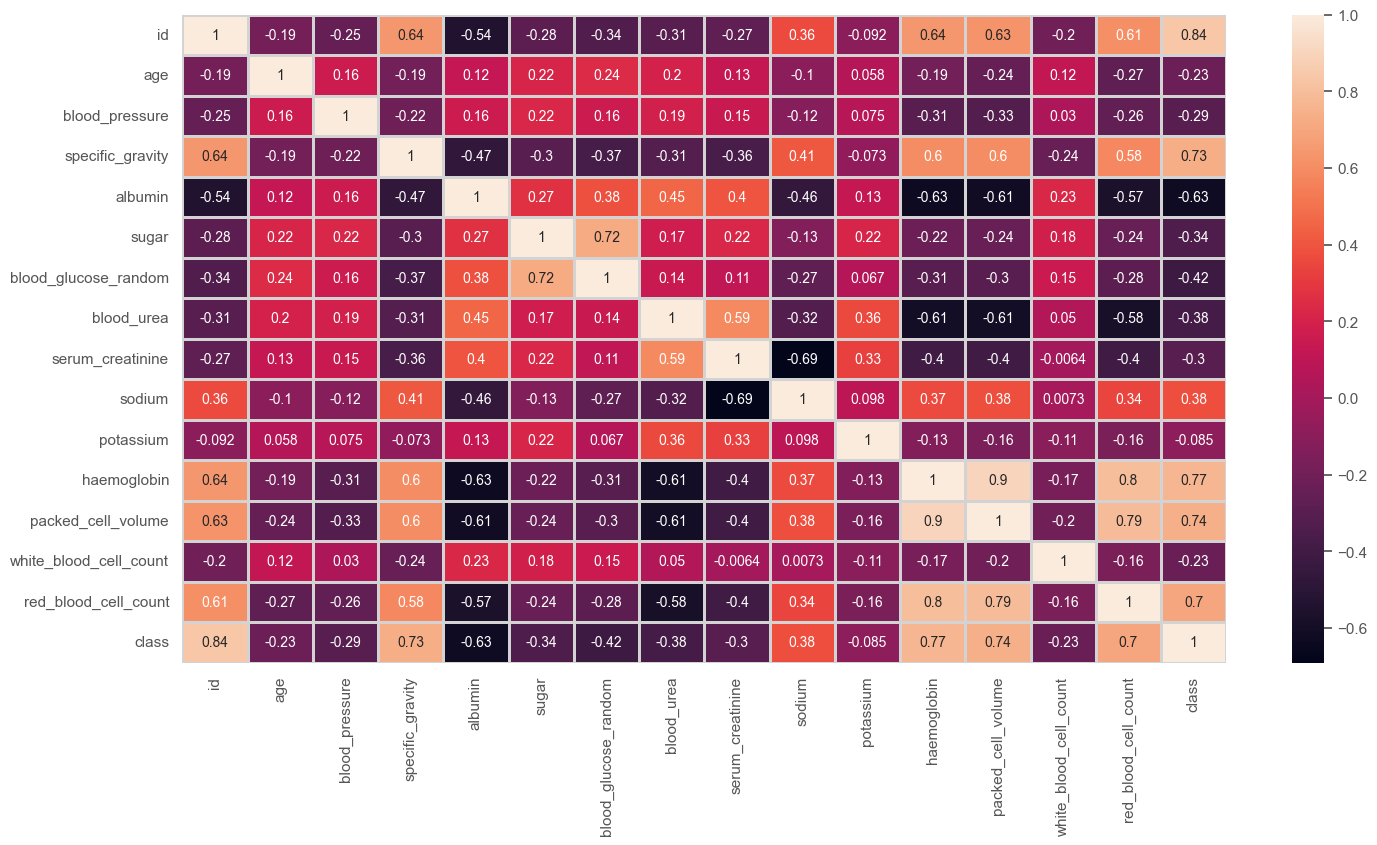

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
df_numeric = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix for numeric columns
correlation_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, linewidth=2, linecolor='lightgray')
plt.show()


In [27]:
# EDA

In [29]:
def voilin(col):
    fig  = px.violin(df, y=col, x='class', color='class', box=True, template='plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue='class', height = 6, aspect = 2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter_plot(col1, col2):
    fig  = px.scatter(df, x=col1, y=col2, color="class",  template='plotly_dark')
    return fig.show()

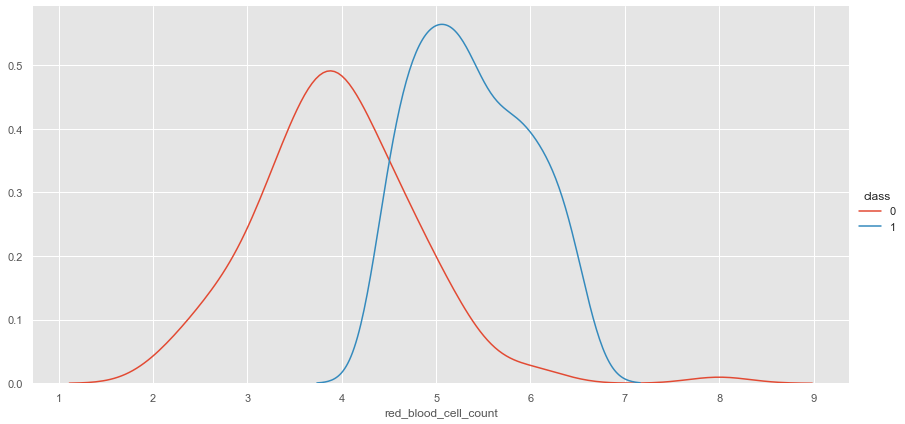

In [29]:
kde('red_blood_cell_count')

In [30]:
# Data Preprocessing

In [31]:
# checking for missing value
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [30]:
df[num_cols].isnull().sum()

id                          0
age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [31]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [32]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [35]:
# two method
# radom sampling->higer null value
# mean/mode-> lower null value

In [33]:
def random_sampling(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [34]:
# random sampling for numerical value
for col in num_cols:
    random_sampling(col)

In [38]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [39]:
random_sampling('red_blood_cells')
random_sampling('pus_cell')

for col in cat_cols:
    impute_mode(col)

In [40]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [41]:
# Feature Encoding

In [35]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()}")

red_blood_cells has 2
pus_cell has 2
pus_cell_clumps has 2
bacteria has 2
hypertension has 2
diabetes_mellitus has 2
coronary_artery_disease has 2
appetite has 2
peda_edema has 2
aanemia has 2
class has 2


In [36]:
# label_encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [37]:
df.head()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,38.0,6000.0,4.9,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,6.1,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [45]:
# Model Building

In [38]:
X = df.drop('class', axis = 1)
y = df['class']

In [39]:
df.to_csv("data.csv")

In [40]:
X.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'aanemia'],
      dtype='object')

In [41]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2, random_state = 0)

In [50]:
# KNN

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Testing Accuracy of KNN is {accuracy_score(y_test, knn.predict(X_test))}")

print(f"Confusion Matrix of KNN is \n {confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report of KNN is \n{classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.959375
Testing Accuracy of KNN is 0.8875
Confusion Matrix of KNN is 
 [[46  6]
 [ 3 25]]

Classification Report of KNN is 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.81      0.89      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



In [52]:
# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 1.0
Confusion Matrix of DTC is 
 [[52  0]
 [ 0 28]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [46]:
# Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV

GRID_PARAMETER = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, GRID_PARAMETER, cv=5, n_jobs=-1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [47]:
# best paramer and best score
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.996875


In [48]:
dtc = grid_search_dtc.best_estimator_

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f"Training Accuracy of DTC is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Testing Accuracy of DTC is {accuracy_score(y_test, dtc.predict(X_test))}")

print(f"Confusion Matrix of DTC is \n {confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report of DTC is \n{classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of DTC is 1.0
Testing Accuracy of DTC is 1.0
Confusion Matrix of DTC is 
 [[52  0]
 [ 0 28]]

Classification Report of DTC is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [49]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = "gini", max_depth = 10, max_features="sqrt", min_samples_leaf= 1, min_samples_split= 7, n_estimators = 400)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=400)

In [50]:
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(f"Training Accuracy of Random Forest is {accuracy_score(y_train, rand_clf.predict(X_train))}")
print(f"Testing Accuracy of Random Forest is {accuracy_score(y_test, rand_clf.predict(X_test))}")

print(f"Confusion Matrix of Random Forest is \n {confusion_matrix(y_test, rand_clf.predict(X_test))}\n")
print(f"Classification Report of Random Forest is \n{classification_report(y_test, rand_clf.predict(X_test))}")

Training Accuracy of Random Forest is 1.0
Testing Accuracy of Random Forest is 1.0
Confusion Matrix of Random Forest is 
 [[52  0]
 [ 0 28]]

Classification Report of Random Forest is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [51]:
# XgBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(objective="binary:logistic", learning_rate = 0.001, max_depth = 10, n_estimators = 100)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(f"Training Accuracy of XGB is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Testing Accuracy of XGB is {accuracy_score(y_test, xgb.predict(X_test))}")

print(f"Confusion Matrix of XGB is \n {confusion_matrix(y_test, xgb.predict(X_test))}\n")
print(f"Classification Report of XGB is \n{classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XGB is 0.61875
Testing Accuracy of XGB is 0.65
Confusion Matrix of XGB is 
 [[52  0]
 [28  0]]

Classification Report of XGB is 
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [54]:
lr_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Training Accuracy of LR is {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Testing Accuracy of LR is {accuracy_score(y_test, lr.predict(X_test))}")

print(f"Confusion Matrix of LR is \n {confusion_matrix(y_test, lr.predict(X_test))}\n")
print(f"Classification Report of LR is \n{classification_report(y_test, lr.predict(X_test))}")

Training Accuracy of LR is 1.0
Testing Accuracy of LR is 0.9875
Confusion Matrix of LR is 
 [[52  0]
 [ 1 27]]

Classification Report of LR is 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [55]:
# SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm  = SVC(probability=True)

parameter = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20]
}

grid_search = GridSearchCV(svm, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [56]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.0001}
0.940625


In [57]:
svm  = SVC(gamma = 0.0001, C  = 15, probability=True)
svm.fit(X_train, y_train)

SVC(C=15, gamma=0.0001, probability=True)

In [58]:
svm_acc = accuracy_score(y_test, svm.predict(X_test))
print(f"Training Accuracy of SVC is {accuracy_score(y_train, svm.predict(X_train))}")
print(f"Testing Accuracy of SVC is {accuracy_score(y_test, svm.predict(X_test))}")

print(f"Confusion Matrix of SVC is \n {confusion_matrix(y_test, svm.predict(X_test))}\n")
print(f"Classification Report of SVC is \n{classification_report(y_test, svm.predict(X_test))}")

Training Accuracy of SVC is 1.0
Testing Accuracy of SVC is 0.95
Confusion Matrix of SVC is 
 [[50  2]
 [ 2 26]]

Classification Report of SVC is 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        52
           1       0.93      0.93      0.93        28

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80



In [59]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

PARAMETERS = {
    'loss': ['log_loss', 'exponential'],
    'learning_rate':[0.001, 0.1, 1, 10],
    'n_estimators':[100,150,180, 200]
}
grid_search_gbc = GridSearchCV(gbc, PARAMETERS, cv=5, n_jobs=-1, verbose= 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['log_loss', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [61]:
print(grid_search_gbc.best_params_)

{'learning_rate': 0.1, 'loss': 'log_loss', 'n_estimators': 100}


In [62]:
print(grid_search_gbc.best_score_)

0.990625


In [71]:
gbc = GradientBoostingClassifier(learning_rate= 0.1, loss = 'log_loss', n_estimators = 100)
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [64]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define and train the model
gbc = GradientBoostingClassifier()  # Initialize the classifier
gbc.fit(X_train, y_train)  # Fit the model to the training data

# Calculate accuracy, confusion matrix, and classification report
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(f"Training Accuracy of GBC is {accuracy_score(y_train, gbc.predict(X_train))}")
print(f"Testing Accuracy of GBC is {accuracy_score(y_test, gbc.predict(X_test))}")

print(f"Confusion Matrix of GBC is \n {confusion_matrix(y_test, gbc.predict(X_test))}\n")
print(f"Classification Report of GBC is \n{classification_report(y_test, gbc.predict(X_test))}")


Training Accuracy of GBC is 1.0
Testing Accuracy of GBC is 1.0
Confusion Matrix of GBC is 
 [[52  0]
 [ 0 28]]

Classification Report of GBC is 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [65]:
# Model Comparison

models = pd.DataFrame({
    'Model':['Logistic Regression', 'KNN', 'SVM', 'DT', 'Random Forest Classifier', 'XgBoost','Gradient Boosting'],
    'Score':[lr_acc, knn_acc, svm_acc, dtc_acc, rand_clf_acc, xgb_acc, gbc_acc]
})

models.sort_values(by='Score', ascending = False)

,Model,Score
3,DT,1.0000
4,Random Forest Classifier,1.0000
6,Gradient Boosting,1.0000
0,Logistic Regression,0.9875
2,SVM,0.9500
1,KNN,0.8875
5,XgBoost,0.6500


In [66]:
import pickle
model = dtc
pickle.dump(model, open("kindey.pkl", 'wb'))

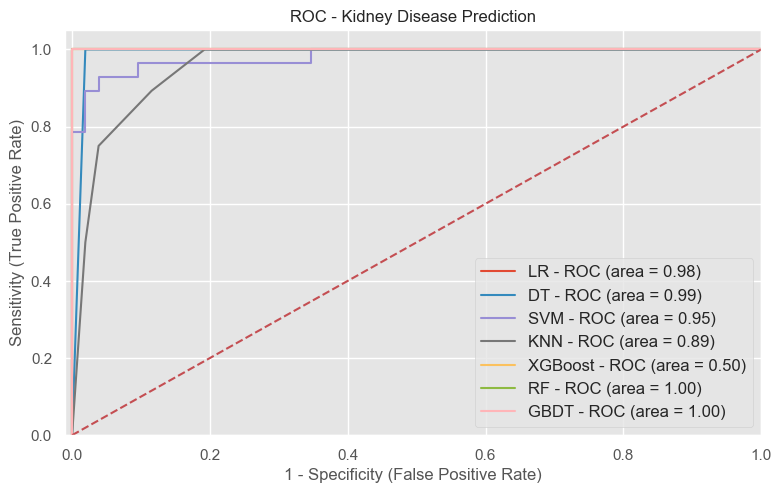

In [67]:
from sklearn import metrics
plt.figure(figsize=(8,5))
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]
for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    plt.plot(fpr1, tpr1, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Kidney Disease Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

[98.75, 100.0, 95.0, 88.75, 65.0, 100.0, 100.0]
[98.21, 92.72, 94.51, 88.87, 50.0, 100.0, 100.0]


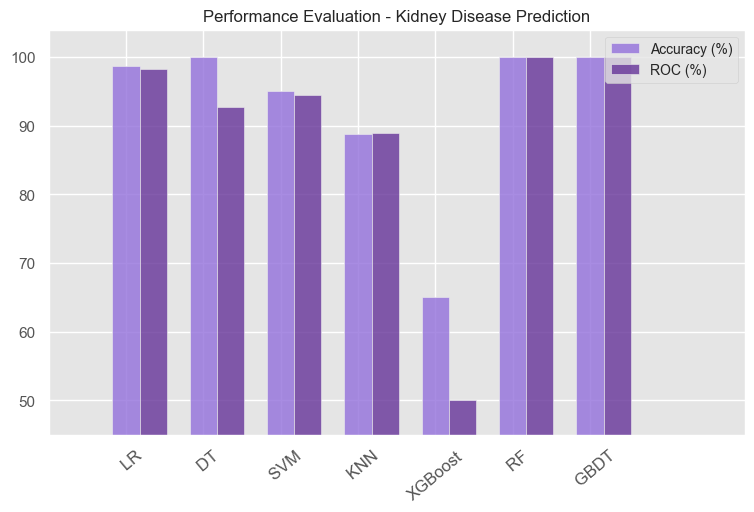

In [68]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svm,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'XGBoost',
    'model': xgb,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = []
means_accuracy = [100*round(lr_acc,4), 100*round(dtc_acc,4), 100*round(svm_acc,4), 100*round(knn_acc,4), 100*round(xgb_acc,4), 
                  100*round(rand_clf_acc,4), 100*round(gbc_acc,4)]

for m in models:
    model = m['model'] 
    model.fit(X_train, y_train) 
    y_pred=model.predict(X_test) 
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
    auc = 100*round(auc,4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)


n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)


fig, ax = plt.subplots(figsize=(8,5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

plt.xlim([-1, 8])
plt.ylim([45, 104])

plt.title('Performance Evaluation - Kidney Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost' , '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_kidney.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()